<center>
  <img src="https://www.inteli.edu.br/wp-content/uploads/2022/04/28103439/Logo-Container.png" />
</center>

# `[SI10-2024-P1]` - Prova Prática

Sistemas de Informação - Módulo 10 - Turma 4



**Nome**: *Escreva seu nome aqui.*

**ANTES DE PROSSEGUIR FAÇA UMA CÓPIA DESTE NOTEBOOK**

----

## Contexto

Uma plataforma online, que atua na venda de produtos, deseja otimizar sua interface para melhorar a experiência do usuário e aumentar as taxas de conversão. Recentemente, a empresa implementou um redesign de sua página web, e os registros dessa mudança estão detalhados nos dados coletados desde então. As variáveis registradas diariamente incluem o número de visitantes únicos, sessões, taxa de rejeição, páginas por sessão, principais origens do tráfego, tipos de dispositivos usados, eventos ocorridos, taxa de conversão e o tempo médio de sessão.

Com base nesses dados, a empresa considera realizar uma mudança similar para otimizar ainda mais sua plataforma. Antes de proceder, a equipe deseja empregar simulações de Monte Carlo para avaliar os possíveis impactos de um novo redesign na taxa de conversão, tempo médio de sessão e taxa de rejeição, utilizando análises estatísticas para prever tendências futuras e ajustar estratégias de maneira informada. Essa abordagem visa garantir que as decisões tomadas maximizem as taxas de conversões, fundamentais para o sucesso contínuo da plataforma.

## Importação do dataset e das bibliotecas

In [1]:
# Importação do dataset
# https://drive.google.com/file/d/1K_2ZDsrhheRDKoHN2ynfLCPGPFiS2CZr/view?usp=drive_link
!gdown 1K_2ZDsrhheRDKoHN2ynfLCPGPFiS2CZr

Downloading...
From: https://drive.google.com/uc?id=1K_2ZDsrhheRDKoHN2ynfLCPGPFiS2CZr
To: /content/ITL-SI10-2024-P1-dataset.csv
100% 7.03k/7.03k [00:00<00:00, 19.7MB/s]


In [104]:
# Importação das bibliotecas
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.utils import resample
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
# Transforma o dataset em DataFrame Pandas
df = pd.read_csv('ITL-SI10-2024-P1-dataset.csv')
df.head()

,Data,Visitantes Únicos,Sessões,Taxa de Rejeição (%),Páginas por Sessão,Principais Origens do Tráfego,Dispositivos,Eventos,Taxa de Conversão (%),Tempo Médio de Sessão (minutos)
0,2023-01-01,113.0,126.0,50.496714,1.834201,Direto,Desktop,8,1.952083,5.395516
1,2023-01-02,90.0,157.0,49.438007,1.955760,Social,Desktop,5,2.066180,4.680899
2,2023-01-03,92.0,185.0,49.800231,2.285052,Direto,Desktop,9,2.058858,5.972584
3,2023-01-04,130.0,206.0,50.251843,2.325464,Pago,Mobile,6,2.134617,4.705854
4,2023-01-05,123.0,155.0,48.070931,2.267006,Direto,Desktop,6,2.420236,5.835801


## Questões

### Questão 1

**Análise Exploratória de Dados**: Faça a exploração dos dados, utilizando gráficos interativos. Identifique correlações entre as variáveis e apresente essas relações em uma matriz de correlação focada nas variáveis mais relevantes para a conversão de vendas.

In [105]:
def compreender_dados(dataframe):
    data_overview = {}
    data_overview['head'] = dataframe.head()
    numeric_df = dataframe.select_dtypes(include=[np.number])
    if not numeric_df.empty:
        desc_stats = numeric_df.describe()
        desc_stats.loc['median'] = numeric_df.median()
        mode_df = numeric_df.mode().iloc[0]
        desc_stats.loc['mode'] = mode_df
        desc_stats.loc['variance'] = numeric_df.var()
        desc_stats.loc['skew'] = numeric_df.skew()
        desc_stats.loc['kurtosis'] = numeric_df.kurt()
        data_overview['description'] = desc_stats
    data_overview['data_types'] = dataframe.dtypes.to_frame(name='Data Type')
    missing_values = dataframe.isnull().mean() * 100
    missing_values_df = missing_values.to_frame(name='Missing Values (%)')
    data_overview['missing_values'] = missing_values_df
    zero_counts = (numeric_df == 0).sum()
    zero_counts_df = zero_counts.to_frame(name='Zero Counts')
    data_overview['zero_counts'] = zero_counts_df
    return data_overview

In [106]:
resultados = compreender_dados(df)

In [107]:
resultados['description']

,Visitantes Únicos,Sessões,Taxa de Rejeição (%),Páginas por Sessão,Eventos,Taxa de Conversão (%),Tempo Médio de Sessão (minutos)
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000
mean,301.133333,449.450000,34.230939,4.007533,5.300000,4.499632,10.045957
std,120.896295,182.619121,10.164913,1.156751,2.109703,1.486718,3.413248
min,90.000000,126.000000,20.177732,1.834201,1.000000,1.952083,4.680899
25%,196.500000,298.750000,24.860077,3.078881,3.750000,3.329572,6.915095
50%,319.500000,456.000000,34.381987,4.027289,5.000000,4.530517,10.039833
75%,401.250000,616.000000,43.013749,4.890745,6.250000,5.748005,13.282681
max,517.000000,769.000000,50.496714,5.996747,10.000000,7.075193,16.360085
median,319.500000,456.000000,34.381987,4.027289,5.000000,4.530517,10.039833
mode,446.000000,422.000000,20.177732,1.834201,6.000000,1.952083,4.680899


In [108]:
resultados['head']

,Data,Visitantes Únicos,Sessões,Taxa de Rejeição (%),Páginas por Sessão,Principais Origens do Tráfego,Dispositivos,Eventos,Taxa de Conversão (%),Tempo Médio de Sessão (minutos)
0,2023-01-01,113.0,126.0,50.496714,1.834201,Direto,Desktop,8,1.952083,5.395516
1,2023-01-02,90.0,157.0,49.438007,1.955760,Social,Desktop,5,2.066180,4.680899
2,2023-01-03,92.0,185.0,49.800231,2.285052,Direto,Desktop,9,2.058858,5.972584
3,2023-01-04,130.0,206.0,50.251843,2.325464,Pago,Mobile,6,2.134617,4.705854
4,2023-01-05,123.0,155.0,48.070931,2.267006,Direto,Desktop,6,2.420236,5.835801


In [109]:
resultados['data_types']

,Data Type
Data,object
Visitantes Únicos,float64
Sessões,float64
Taxa de Rejeição (%),float64
Páginas por Sessão,float64
Principais Origens do Tráfego,object
Dispositivos,object
Eventos,int64
Taxa de Conversão (%),float64
Tempo Médio de Sessão (minutos),float64


In [110]:
resultados['missing_values']

,Missing Values (%)
Data,0.0
Visitantes Únicos,0.0
Sessões,0.0
Taxa de Rejeição (%),0.0
Páginas por Sessão,0.0
Principais Origens do Tráfego,0.0
Dispositivos,0.0
Eventos,0.0
Taxa de Conversão (%),0.0
Tempo Médio de Sessão (minutos),0.0


In [111]:
resultados['zero_counts']

,Zero Counts
Visitantes Únicos,0
Sessões,0
Taxa de Rejeição (%),0
Páginas por Sessão,0
Eventos,0
Taxa de Conversão (%),0
Tempo Médio de Sessão (minutos),0


#### Matriz de correlações e gráficos

In [112]:
def calcular_e_visualizar_correlacoes(data):
    correlation_matrix = data.select_dtypes(include=['number']).corr()
    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
    plt.title('Matriz de Correlação')
    plt.show()

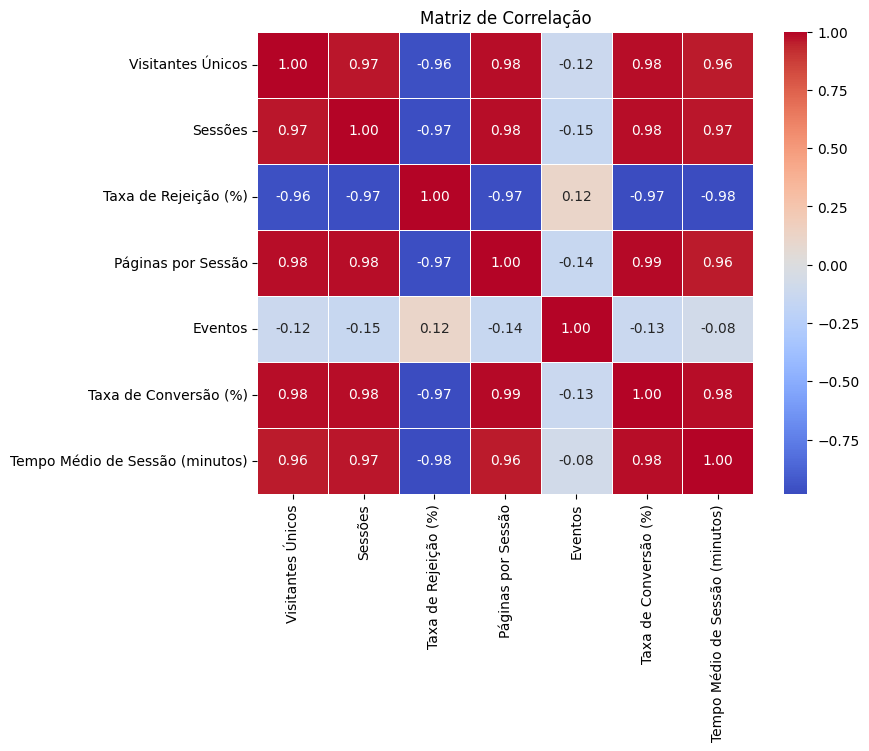

In [113]:
visualizacao = calcular_e_visualizar_correlacoes(df)
visualizacao

In [114]:
fig = px.scatter(
    df,
    x="Tempo Médio de Sessão (minutos)",
    y="Taxa de Conversão (%)",
    trendline="ols",  # Adiciona uma linha de regressão linear ordinária ('ordinary least squares')
    title="Relação entre Tempo de Sessão e Taxa de Conversão",
    labels={"Tempo Médio de Sessão (minutos)": "Tempo Médio de Sessão (min)",
            "Taxa de Conversão (%)": "Taxa de Conversão (%)"}
)
fig.update_layout(
    xaxis_title="Tempo Médio de Sessão (min)",
    yaxis_title="Taxa de Conversão (%)",
    height=500,
    width=800
)
fig.show()

In [115]:
fig = px.scatter(
    df,
    x="Taxa de Rejeição (%)",
    y="Taxa de Conversão (%)",
    trendline="ols",  # Adiciona uma linha de regressão linear ('ordinary least squares')
    title="Relação entre Taxa de Rejeição e Taxa de Conversão",
    labels={"Taxa de Rejeição (%)": "Taxa de Rejeição (%)",
            "Taxa de Conversão (%)": "Taxa de Conversão (%)"}
)
fig.update_layout(
    xaxis_title="Taxa de Rejeição (%)",
    yaxis_title="Taxa de Conversão (%)",
    height=500,
    width=800
)
fig.show()

### Questão 2

**Simulação de Monte Carlo**: Implemente uma simulação de Monte Carlo para avaliar os possíveis efeitos de um novo redesign na plataforma. Analise como diferentes variáveis podem impactar os resultados e discuta os cenários que esta simulação pode prever, ajudando a empresa a tomar decisões mais informadas sobre o redesign.

In [116]:
media =  df['Visitantes Únicos'].mean()
print(f"Média: {media}")

desvio_padrao =df['Visitantes Únicos'].std()
print(f"Desvio padrão: {desvio_padrao}")

dias_para_prever = 30
num_simulacoes = 10000

# 3. Gerar todas as simulações e armazenar em uma lista
simulacoes = [np.random.normal(loc=media, scale=desvio_padrao, size=dias_para_prever) for _ in range(num_simulacoes)]

# 5. Converter a lista de arrays em um DataFrame
resultados_simulacao = pd.DataFrame(simulacoes).transpose()

# 6. Análise dos Resultados
resultados_media = resultados_simulacao.mean(axis=1)
resultados_std = resultados_simulacao.std(axis=1)

# Dados para o gráfico
dias = list(range(1, dias_para_prever + 1))
previsoes = pd.DataFrame({
    'Dia': dias,
    'Média das Previsões': resultados_media,
    'Desvio Padrão': resultados_std,
    'Limite Inferior': resultados_media - resultados_std,
    'Limite Superior': resultados_media + resultados_std
})

# Criando o gráfico com Plotly Express
fig = px.line(previsoes, x='Dia', y='Média das Previsões', title='Previsão de Visitas para os Próximos 30 Dias')
fig.add_scatter(x=previsoes['Dia'], y=previsoes['Limite Inferior'], fill='tonexty', mode='lines', line=dict(color='lightgrey'), showlegend=False)
fig.add_scatter(x=previsoes['Dia'], y=previsoes['Limite Superior'], fill='tonexty', mode='lines', line=dict(color='lightgrey'), showlegend=False, name='Intervalo de 1 Desvio Padrão')
fig.update_layout(xaxis_title='Dias', yaxis_title='Número de Visitas', legend_title='Legenda')
fig.show()


Média: 301.1333333333333
Desvio padrão: 120.8962949154927


In [117]:
previsoes

,Dia,Média das Previsões,Desvio Padrão,Limite Inferior,Limite Superior
0,1,301.547247,121.734772,179.812475,423.282019
1,2,299.563716,121.793451,177.770265,421.357168
2,3,302.063232,121.085666,180.977565,423.148898
3,4,299.745966,120.989608,178.756358,420.735573
4,5,302.273145,119.966756,182.306388,422.239901
5,6,300.209608,121.577520,178.632088,421.787128
6,7,300.210256,121.823855,178.386402,422.034111
7,8,300.079499,120.873397,179.206102,420.952896
8,9,302.753234,120.647184,182.106049,423.400418
9,10,301.712894,121.658802,180.054092,423.371697


In [118]:
import plotly.express as px
import numpy as np
import pandas as pd

# Suponha que df é o DataFrame que contém a 'Rejection Rate'
mean_rejection_rate_pre_change = df.iloc[:30]['Taxa de Rejeição (%)'].mean()
mean_rejection_rate_post_change = df.iloc[30:]['Taxa de Rejeição (%)'].mean()

# Diferença observada
observed_difference = mean_rejection_rate_post_change - mean_rejection_rate_pre_change

# Simulação de Monte Carlo
n_simulations = 10000
std_dev = df['Taxa de Rejeição (%)'].std()

# Gerar efeitos simulados como uma distribuição normal centrada na diferença observada
simulated_effects = np.random.normal(loc=observed_difference, scale=std_dev, size=n_simulations)

# Taxa de rejeição base para simulação
base_rejection_rate = mean_rejection_rate_pre_change

# Calcular novas taxas de rejeição potenciais
new_rejection_rates = base_rejection_rate + simulated_effects

# Análise dos resultados
average_new_rejection_rate = np.mean(new_rejection_rates)
percentile_5th = np.percentile(new_rejection_rates, 5)
percentile_95th = np.percentile(new_rejection_rates, 95)

# Criar DataFrame para o Plotly
data_rej = pd.DataFrame({
    'Novas taxas de rejeição': new_rejection_rates
})

# Criando o gráfico com Plotly Express
fig = px.histogram(data_rej, x='Novas taxas de rejeição', nbins=50, title='Distribuição simulada das novas taxas de rejeição')
fig.add_vline(x=average_new_rejection_rate, line_dash="dash", line_color="red", annotation_text="Média")
fig.add_vline(x=percentile_5th, line_dash="dash", line_color="green", annotation_text="5º Percentil")
fig.add_vline(x=percentile_95th, line_dash="dash", line_color="green", annotation_text="95º Percentil")
fig.update_layout(xaxis_title='Taxa de Rejeição (%)', yaxis_title='Frequência')
fig.show()


In [119]:
data_rej

,Novas taxas de rejeição
0,40.583367
1,-1.636478
2,36.795400
3,37.217161
4,22.577245
...,...
9995,35.728643
9996,35.032096
9997,24.575940
9998,16.799844


In [120]:
import plotly.express as px
import numpy as np
import pandas as pd

tempos_visita = df['Tempo Médio de Sessão (minutos)']

# Para a simulação, suponhamos que temos dois períodos: antes e depois da mudança similar no dia 30
tempos_antes = tempos_visita[:29]
tempos_depois = tempos_visita[30:]

# Calculando a média e desvio padrão antes e depois da mudança
media_antes = np.mean(tempos_antes)
desvio_padrao_antes = np.std(tempos_antes, ddof=1)
media_depois = np.mean(tempos_depois)
desvio_padrao_depois = np.std(tempos_depois, ddof=1)

# Impacto estimado da mudança anterior
impacto_estimado = (media_depois - media_antes) / media_antes

# Usando esse impacto para estimar o efeito de uma nova mudança similar
nova_media = media_antes * (1 + impacto_estimado)
novo_desvio_padrao = desvio_padrao_antes * (1 + impacto_estimado)

# Simulando 1000 cenários de Monte Carlo com os novos parâmetros
simulacoes = np.random.normal(nova_media, novo_desvio_padrao, 1000)

# Calculando os intervalos de confiança de 95%
percentil_2_5 = np.percentile(simulacoes, 2.5)
percentil_97_5 = np.percentile(simulacoes, 97.5)

# Criar DataFrame para o Plotly
data_tem = pd.DataFrame({
    'Tempo médio de visitas (simulação)': simulacoes
})

# Criando o gráfico com Plotly Express
fig = px.histogram(data_tem, x='Tempo médio de visitas (simulação)', nbins=30, title='Impacto da Inclusão de um Novo Vídeo no Tempo Médio de Permanência')
fig.add_vline(x=media_antes, line_dash="dash", line_color="red", annotation_text="Média Antes")
fig.add_vline(x=nova_media, line_dash="dash", line_color="green", annotation_text="Projeção da Nova Média")
fig.add_vline(x=percentil_2_5, line_dash="dot", line_color="orange", annotation_text="2.5% Percentil")
fig.add_vline(x=percentil_97_5, line_dash="dot", line_color="orange", annotation_text="97.5% Percentil")
fig.update_layout(xaxis_title='Tempo Médio de Visita (minutos)', yaxis_title='Frequência', legend_title_text='Legenda')
fig.show()


In [121]:
data_tem

,Tempo médio de visitas (simulação)
0,14.074610
1,16.802190
2,16.464430
3,14.236649
4,11.667590
...,...
995,9.793431
996,8.750858
997,17.599963
998,15.278460


### Questão 3

**Análise de Sensibilidade**: Realize uma análise de sensibilidade para examinar como alterações em diferentes variáveis de entrada afetam as previsões da taxa de conversão.

In [122]:
# Removendo a coluna de data para focar nas variáveis numéricas
X = df.drop(["Data", "Taxa de Conversão (%)","Principais Origens do Tráfego", "Dispositivos" ], axis=1)
y = df["Taxa de Conversão (%)"]

# Dividindo os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Criando e treinando o modelo de floresta aleatória
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Avaliando o modelo
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"RMSE: {np.sqrt(mse):.2f}")
print(f"MAE: {mae:.2f}")

RMSE: 0.18
MAE: 0.13


Diante dos resultados obtidos, é possível entender que, a partir do RMSE obtido, as previsões do modelo criado possuem um desvio padrão de 0.18% em torno dos valores reais.

Já ao olhar para o MAE, percebe-se que o erro absoluto médio das previsões do modelo é de 0.13%. A partir dessa taxa, compreendemos que o modelo tem uma alta precisão na previsão das taxas de interesse.

In [129]:
# Definição dos parâmetros do modelo
coef_tempo_sessao = 0.37787
intercepto = 0.969023

# Intervalo de tempo de sessão de 5 a 16 minutos
tempos_de_sessao = range(1, 10)

# Calculando a taxa de conversão para cada tempo de sessão
for tempo in tempos_de_sessao:
    taxa_de_conversao = coef_tempo_sessao * tempo + intercepto
    print(f"Tempo de Sessão: {tempo} minutos, Taxa de Conversão: {taxa_de_conversao:.2f}%")

Tempo de Sessão: 1 minutos, Taxa de Conversão: 1.35%
Tempo de Sessão: 2 minutos, Taxa de Conversão: 1.72%
Tempo de Sessão: 3 minutos, Taxa de Conversão: 2.10%
Tempo de Sessão: 4 minutos, Taxa de Conversão: 2.48%
Tempo de Sessão: 5 minutos, Taxa de Conversão: 2.86%
Tempo de Sessão: 6 minutos, Taxa de Conversão: 3.24%
Tempo de Sessão: 7 minutos, Taxa de Conversão: 3.61%
Tempo de Sessão: 8 minutos, Taxa de Conversão: 3.99%
Tempo de Sessão: 9 minutos, Taxa de Conversão: 4.37%


In [130]:
import pandas as pd
import numpy as np

sensibilidade_df = df.drop(["Data", "Taxa de Conversão (%)","Principais Origens do Tráfego", "Dispositivos" ], axis=1)

predicted_conversions = model.predict(sensibilidade_df)
sensibilidade_df['Taxa de Conversão Prevista (%)'] = predicted_conversions

sensibilidade_df.head(10)

,Visitantes Únicos,Sessões,Taxa de Rejeição (%),Páginas por Sessão,Eventos,Tempo Médio de Sessão (minutos),Taxa de Conversão Prevista (%)
0,113.0,126.0,50.496714,1.834201,8,5.395516,2.294085
1,90.0,157.0,49.438007,1.955760,5,4.680899,2.171548
2,92.0,185.0,49.800231,2.285052,9,5.972584,2.186700
3,130.0,206.0,50.251843,2.325464,6,4.705854,2.446139
4,123.0,155.0,48.070931,2.267006,6,5.835801,2.435481
5,148.0,191.0,47.647219,2.362449,9,6.773194,2.884022
6,150.0,197.0,49.036840,2.662313,4,5.318291,2.494229
7,146.0,202.0,47.801333,2.356262,9,5.666004,2.646308
8,137.0,284.0,46.140695,2.651792,2,6.134571,2.818313
9,131.0,254.0,46.729001,2.569731,10,5.968601,2.694952


In [131]:
# Configurações do modelo
n_simulations = 1000
predicted_conversions = []

for _ in range(n_simulations):
    # O método de bootstrapping nesta linha de código cria uma nova amostra dos dados originais,
    # permitindo repetições, para estimar a variabilidade das estatísticas ou do modelo
    bootstrap_sample = resample(X, n_samples=len(X), replace=True, random_state=None)

    # Fazendo previsões com o modelo de floresta aleatória
    predicted_conversion = model.predict(bootstrap_sample)

    # Armazene os resultados
    predicted_conversions.extend(predicted_conversion)

# Converta os resultados em um DataFrame para análise
predicted_conversions_df = pd.DataFrame(predicted_conversions, columns=['Taxa de Conversão Prevista (%)'])

# Calculando estatísticas descritivas
statistics_df = predicted_conversions_df.describe()

print(statistics_df)

       Taxa de Conversão Prevista (%)
count                    60000.000000
mean                         4.505161
std                          1.431289
min                          2.171548
25%                          3.294584
50%                          4.480633
75%                          5.685811
max                          6.959636


In [126]:
# Criando o histograma
fig = px.histogram(predicted_conversions_df, x='Taxa de Conversão Prevista (%)',
                   title='Distribuição da Taxa de Conversão Prevista',
                   labels={'Taxa de Conversão Prevista (%)': 'Taxa de Conversão (%)'},
                   nbins=30,
                   opacity=0.75,  # Opacidade das barras
                   color_discrete_sequence=['indianred'])  # Cor das barras

fig.update_layout(
    xaxis_title='Taxa de Conversão (%)',
    yaxis_title='Contagem',
    bargap=0.2,  # Espaçamento entre as barras
    width=800,
    height=500
)
fig.show()

## Entrega

Siga esses passos para entregar sua prova.

1. Crie um repositório no GitHub para essa entrega.

2. Submeta seu desenvolvimento neste repositório.

3. Garanta que o repositório é publicamente acessível (eliminatório).

4. No Google forms da prova, submeta a URL do repositório.